In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
np.random.seed(123)

In [5]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [6]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
from learningratefinder import LearningRateFinder

Epoch 1/19
110/110 [==============================] - 5s 33ms/step - loss: 2.3047 - accuracy: 0.1106
Epoch 2/19
110/110 [==============================] - 4s 32ms/step - loss: 2.3070 - accuracy: 0.1129
Epoch 3/19
110/110 [==============================] - 4s 32ms/step - loss: 2.3060 - accuracy: 0.1083
Epoch 4/19
110/110 [==============================] - 4s 32ms/step - loss: 2.3073 - accuracy: 0.1074
Epoch 5/19
110/110 [==============================] - 4s 32ms/step - loss: 2.3037 - accuracy: 0.1080
Epoch 6/19
110/110 [==============================] - 4s 33ms/step - loss: 2.3049 - accuracy: 0.1117
Epoch 7/19
110/110 [==============================] - 4s 33ms/step - loss: 2.3046 - accuracy: 0.0977
Epoch 8/19
110/110 [==============================] - 4s 33ms/step - loss: 2.3015 - accuracy: 0.1097
Epoch 9/19
110/110 [==============================] - 4s 33ms/step - loss: 2.2850 - accuracy: 0.1423
Epoch 10/19
110/110 [==============================] - 4s 34ms/step - loss: 2.2163 - accura

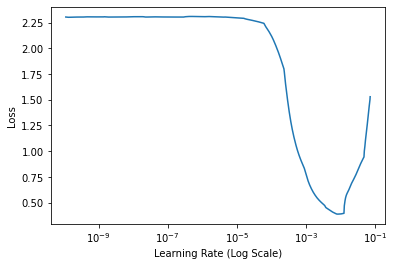

In [8]:
lr_finder = LearningRateFinder(model)
lr_finder.find((x_train, y_train),1e-10, 1e+1)
lr_finder.plot_loss()

# In my opinion best learning rate is between $10^{-4}$ and  $10^{-3}$

In [12]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data = (x_val, y_val))

Epoch 1/30
110/110 [==============================] - 6s 50ms/step - loss: 2.1284 - accuracy: 0.3046 - val_loss: 1.7443 - val_accuracy: 0.7450
Epoch 2/30
110/110 [==============================] - 4s 33ms/step - loss: 1.3580 - accuracy: 0.5926 - val_loss: 0.7586 - val_accuracy: 0.8300
Epoch 3/30
110/110 [==============================] - 4s 33ms/step - loss: 0.9206 - accuracy: 0.7017 - val_loss: 0.4931 - val_accuracy: 0.8850
Epoch 4/30
110/110 [==============================] - 4s 33ms/step - loss: 0.7493 - accuracy: 0.7506 - val_loss: 0.3852 - val_accuracy: 0.8900
Epoch 5/30
110/110 [==============================] - 4s 34ms/step - loss: 0.6547 - accuracy: 0.7777 - val_loss: 0.3406 - val_accuracy: 0.9000
Epoch 6/30
110/110 [==============================] - 4s 33ms/step - loss: 0.5601 - accuracy: 0.8191 - val_loss: 0.2867 - val_accuracy: 0.9250
Epoch 7/30
110/110 [==============================] - 4s 34ms/step - loss: 0.5019 - accuracy: 0.8357 - val_loss: 0.2613 - val_accuracy: 0.9400